# linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
#from sklearn.
#import 

In [3]:
df = pd.read_csv("/media/radial/Work/BDAP/Books/ML/ISLR/ISLR-python-master/Notebooks/Data/Auto.csv")

In [4]:
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [5]:
df.shape

(397, 9)

In [6]:
df.drop(df[df.horsepower == "?"].index, inplace=True)
df.shape

(392, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [8]:
df.horsepower = df.horsepower.astype(int)

In [9]:
nameless_df = df
del nameless_df["name"]
nameless_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [10]:
nameless_df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

#  CORRELATIOn

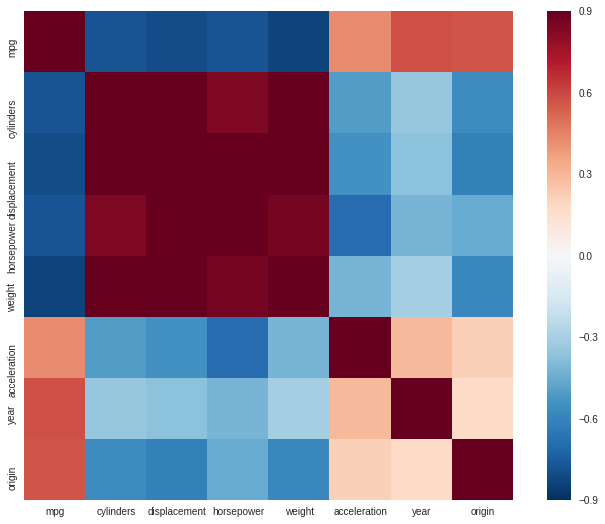

In [11]:
#sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
corrmat = nameless_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.9, square=True)

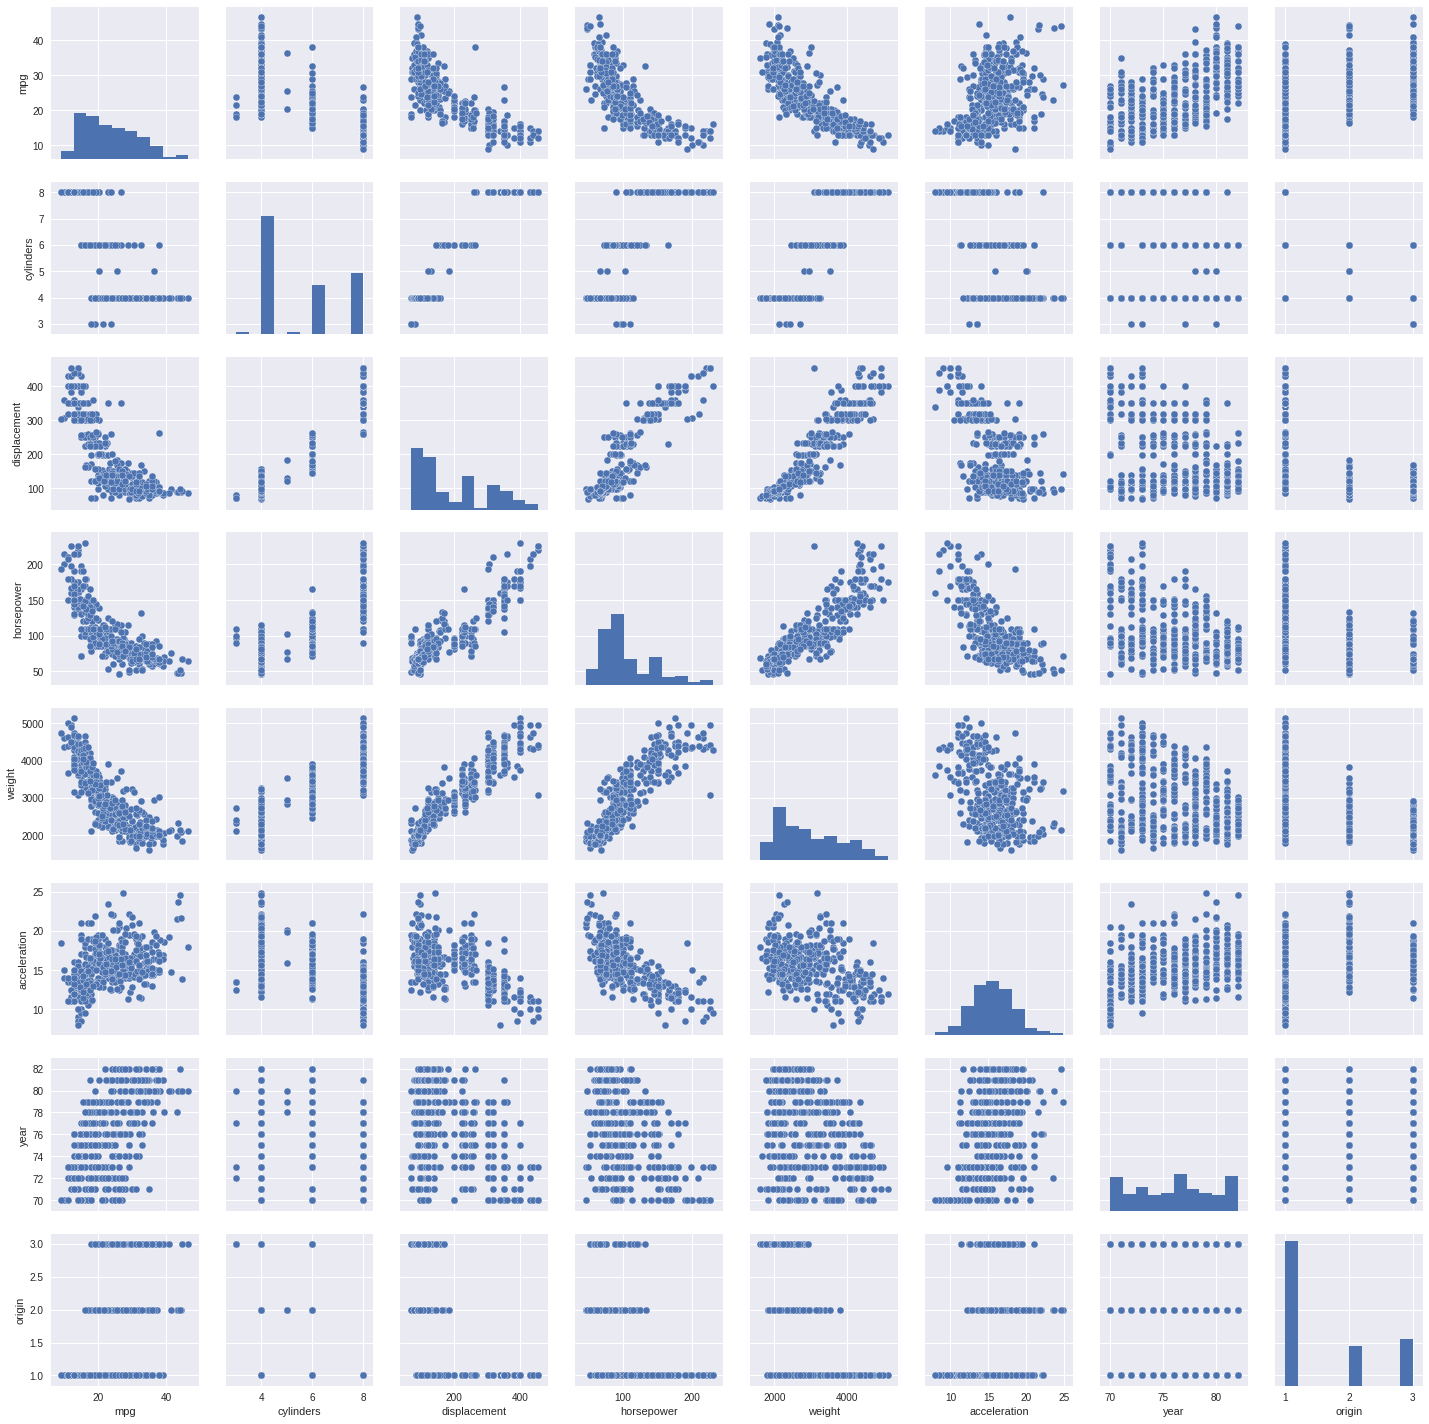

In [12]:
sns.pairplot(nameless_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]);

In [15]:
nameless_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

{'boxes': [<matplotlib.lines.Line2D at 0x7f29d292d438>],
 'caps': [<matplotlib.lines.Line2D at 0x7f29d2936eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f29d2940828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f29d2939908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f29d292ddd8>,
  <matplotlib.lines.Line2D at 0x7f29d292df98>]}

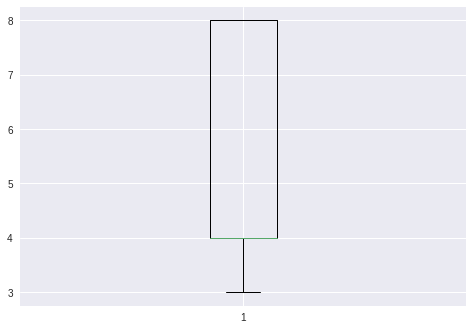

In [28]:
plt.boxplot(nameless_df["cylinders"])

# Simple Logistic regression

In [13]:
import sklearn.linear_model as sk_lm
from sklearn.preprocessing import scale


# Mulitple Logistic regression

In [14]:
nameless_df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

In [30]:
nameless_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [35]:
nameless_df.cylinders = nameless_df.cylinders.astype(object)

In [36]:
nameless_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null object
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


In [37]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [39]:
nameless_df.shape

(392, 8)

In [49]:
import random
random.seed(10)

In [50]:
from sklearn.utils import shuffle

In [51]:
df_rand = shuffle(nameless_df)

In [71]:
df_rand.head()

mpg cylinders  displacement  horsepower  weight  acceleration  year  \
46   22.0         4         140.0          72    2408          19.0    71   
128  15.0         6         250.0         100    3336          17.0    74   
161  16.0         6         250.0         105    3897          18.5    75   
110  22.0         4         108.0          94    2379          16.5    73   
189  15.5         8         304.0         120    3962          13.9    76   

     origin  
46        1  
128       1  
161       1  
110       3  
189       1

In [127]:
df_train = df_rand[:300]
df_test = df_rand[301:]

In [128]:
import statsmodels.api as sma
df_train_mod = df_train
df_train_mod.head()

mpg cylinders  displacement  horsepower  weight  acceleration  year  \
46   22.0         4         140.0          72    2408          19.0    71   
128  15.0         6         250.0         100    3336          17.0    74   
161  16.0         6         250.0         105    3897          18.5    75   
110  22.0         4         108.0          94    2379          16.5    73   
189  15.5         8         304.0         120    3962          13.9    76   

     origin  
46        1  
128       1  
161       1  
110       3  
189       1

In [150]:
df_train = df_rand[:300]

In [151]:
del df_train_mod["year"]

In [152]:
x = df_train["year"]
x = x.reshape(-1,1)
y = df_train_mod 
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(y,x)
print(clf)

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/radial/.local/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


In [153]:
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [70 71 72 73 74 75 76 77 78 79 80 81 82]
coefficients:  [[ -2.27515503e-01   3.67089748e-01   1.01887695e-02   5.89627998e-02
   -5.06198554e-03   1.18331363e-01   4.30584803e-01]
 [ -1.79376152e-01  -8.45903335e-01   1.63383898e-02  -4.96525066e-02
   -5.57712060e-06  -3.60609215e-01   9.34558098e-04]
 [ -2.97703298e-01  -1.38186284e-01  -8.08960663e-03   1.46122314e-02
   -8.02383661e-04   5.96462219e-02   1.79306918e-01]
 [ -3.15452411e-01  -5.34068339e-02   1.15199773e-03   1.23659353e-02
   -1.64785860e-03   5.32407519e-02   1.11998047e-02]
 [ -1.47342168e-01   7.09015388e-01  -1.96876503e-02  -4.09022436e-02
    7.39525240e-04  -8.40530236e-02  -9.42399878e-03]
 [ -2.54707829e-01  -2.92297773e-01  -7.45531059e-03  -7.51305820e-02
    2.59527760e-03  -2.60022655e-01   4.00486284e-01]
 [ -1.15891611e-01   1.93889763e-01  -4.55667225e-03  -5.20966247e-02
    1.09916954e-03  -2.04240038e-01   7.17416839e-02]
 [ -1.91819411e-02   3.16013122e-01  -1.32710769e-02   2.78348121e

In [156]:
y_pred = clf.fit(y,x).predict(df_test)

/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/radial/.local/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/radial/.local/lib/python3.5/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [161]:
est = y_pred

In [160]:
df_test_val= df_rand[301:]
real = df_test_val["year"]

In [162]:
confusion_matrix(est,real)

array([[2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 4, 1, 0, 2, 0, 0, 0, 0, 0, 0],
       [1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 3, 2, 2, 0, 2, 1, 0, 1, 0],
       [2, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 3, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 2, 1, 1, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 3],
       [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 3, 1, 3]])

In [168]:
x = confusion_matrix(est,real)
x = pd.DataFrame(x)
x.head()

0   1   2   3   4   5   6   7   8   9   10  11  12
0   2   0   0   1   0   0   0   0   1   0   0   0   0
1   0   1   0   1   1   0   0   0   0   0   0   0   0
2   0   0   1   4   1   0   2   0   0   0   0   0   0
3   1   2   2   3   0   1   1   1   0   0   0   0   0
4   0   0   0   0   1   1   0   0   0   0   0   0   0

In [170]:
x.columns = range(70,83)
x.index = range(70,83)
x.head()

70  71  72  73  74  75  76  77  78  79  80  81  82
70   2   0   0   1   0   0   0   0   1   0   0   0   0
71   0   1   0   1   1   0   0   0   0   0   0   0   0
72   0   0   1   4   1   0   2   0   0   0   0   0   0
73   1   2   2   3   0   1   1   1   0   0   0   0   0
74   0   0   0   0   1   1   0   0   0   0   0   0   0

In [174]:
x[2:3]

70  71  72  73  74  75  76  77  78  79  80  81  82
72   0   0   1   4   1   0   2   0   0   0   0   0   0

In [183]:
x["total"] = 0
for i in range(70,83):
    x["total"][i]= x.sum(axis = 1)[i]
x.head()

70  71  72  73  74  75  76  77  78  79  80  81  82  total
70   2   0   0   1   0   0   0   0   1   0   0   0   0      4
71   0   1   0   1   1   0   0   0   0   0   0   0   0      3
72   0   0   1   4   1   0   2   0   0   0   0   0   0      8
73   1   2   2   3   0   1   1   1   0   0   0   0   0     11
74   0   0   0   0   1   1   0   0   0   0   0   0   0      2

In [188]:
x.index = range(1,14)

1

In [190]:
sum = 0 
for i in range(1,14):
    sum = sum + x[i+69][i]
sum

18

In [193]:
acc= sum/x.total.sum()*100
acc

19.780219780219781

In [163]:
print(classification_report(real,est))

             precision    recall  f1-score   support

         70       0.50      0.33      0.40         6
         71       0.33      0.17      0.22         6
         72       0.12      0.33      0.18         3
         73       0.27      0.30      0.29        10
         74       0.50      0.14      0.22         7
         75       0.17      0.29      0.21         7
         76       0.00      0.00      0.00         8
         77       0.00      0.00      0.00         8
         78       0.00      0.00      0.00        11
         79       0.33      0.50      0.40         6
         80       0.20      0.40      0.27         5
         81       0.00      0.00      0.00         7
         82       0.25      0.43      0.32         7

avg / total       0.19      0.20      0.18        91



/home/radial/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
